In [2]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
sns.reset_defaults()

/var/folders/dx/q8czrrps0h71z5jsy2wrs1rr0000gp/T/ipykernel_28497/4057541388.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_sig['direct_sig'] = 1
/var/folders/dx/q8czrrps0h71z5jsy2wrs1rr0000gp/T/ipykernel_28497/4057541388.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_sig['direct_sig'] = -1


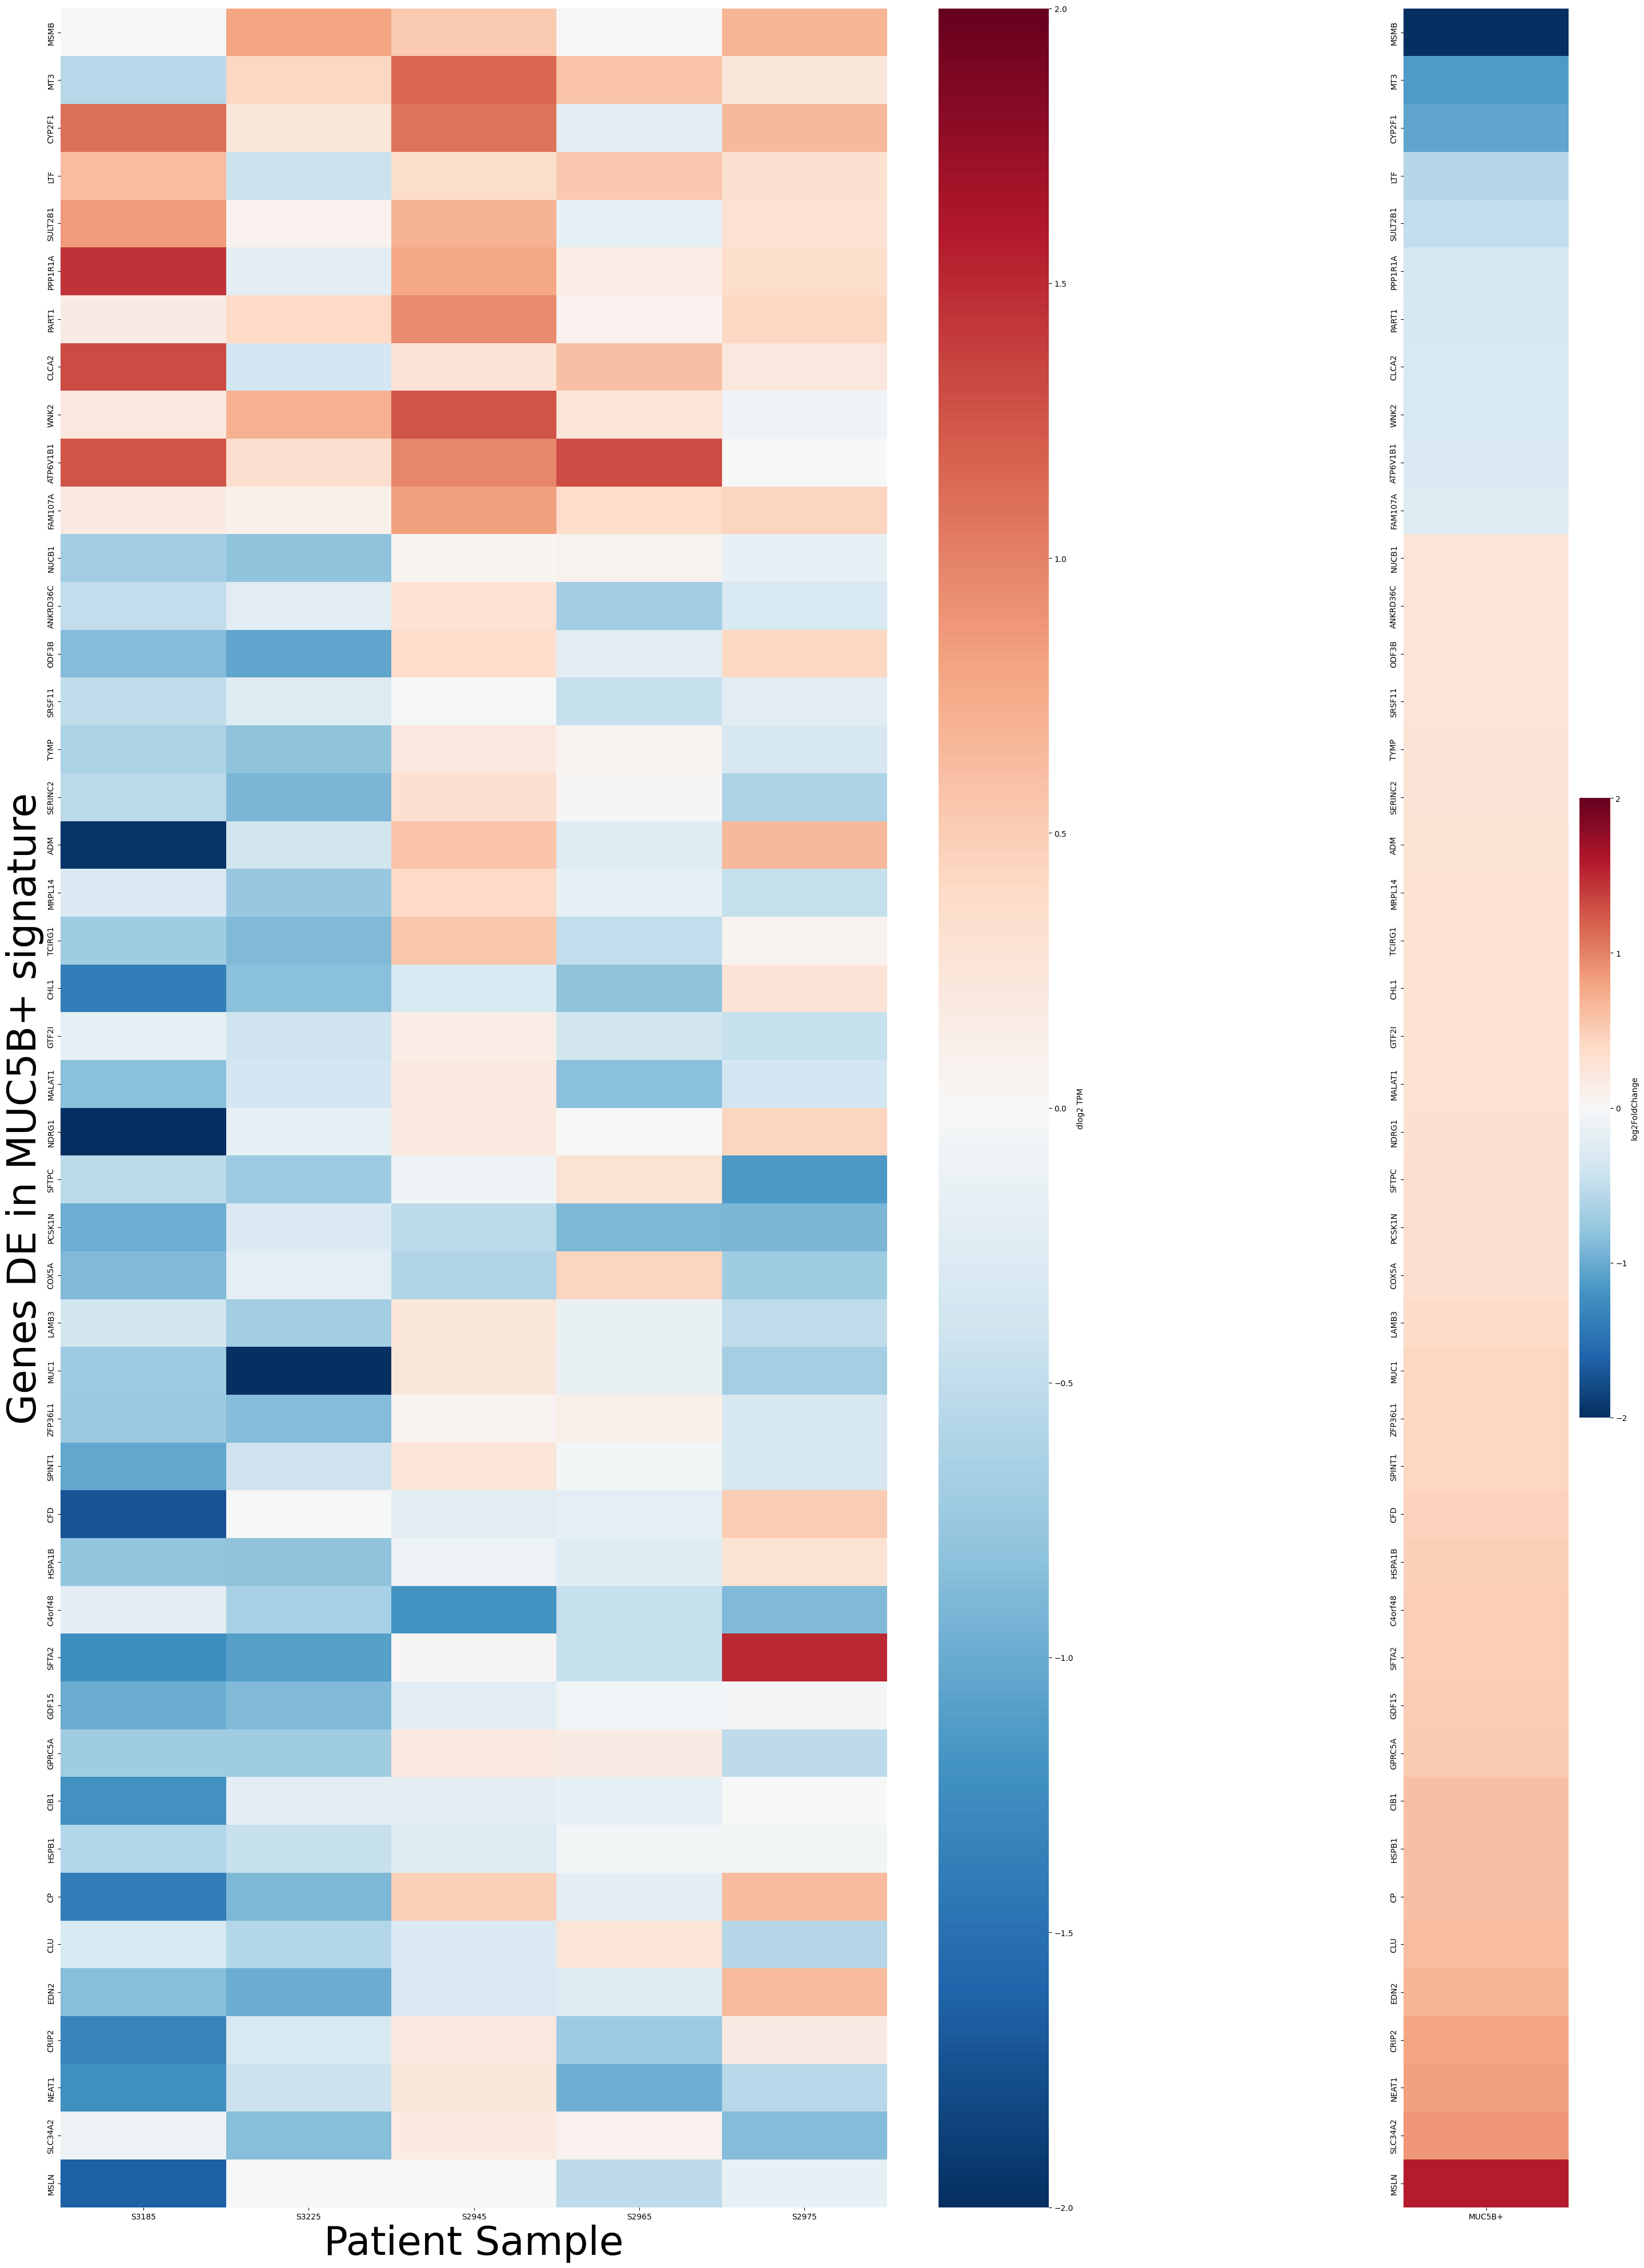

In [ ]:
tpm = pd.read_csv('./data_for_code/comb_tpm.csv', index_col=0)

dmso_df = tpm[tpm.columns[tpm.columns.str.contains('D')]]
dmso_df = dmso_df[dmso_df.columns[dmso_df.columns.str[-1] == '5']]
dmso_df = dmso_df[dmso_df.columns[~dmso_df.columns.str.contains('2952')]] # this sample is an outlier

drug_df = tpm[tpm.columns[~tpm.columns.str.contains('D')]]
drug_df = drug_df[drug_df.columns[drug_df.columns.str[-1] == '5']]
drug_df = drug_df[drug_df.columns[~drug_df.columns.str.contains('2952')]]

diff_df = DataFrame(np.array(drug_df) - np.array(dmso_df), index=drug_df.index, columns=drug_df.columns)

mean_diff = diff_df.mean(axis=1)
pos_df = DataFrame(mean_diff[mean_diff > 0.25], columns=['d_mean'])
pos_df['direct'] = 1
neg_df = DataFrame(mean_diff[mean_diff < -0.25], columns=['d_mean'])
neg_df['direct'] = -1
genes_up_down = pd.concat([pos_df, neg_df])

nom = 'MUC5B+'
sign_df = pd.read_csv(f'./data_for_code/res_{nom}.csv', index_col=0)
sig_df = sign_df[sign_df['p_val_adj'] < 0.05]
pos_sig = sig_df[sig_df['avg_log2FC'] > 0.25]
pos_sig['direct_sig'] = 1
neg_sig = sig_df[sig_df['avg_log2FC'] < -0.25]
neg_sig['direct_sig'] = -1
sig_df = pd.concat([pos_sig, neg_sig])
ind_com = list(set(sig_df.index) & set(genes_up_down.index))
sig_df = pd.concat([sig_df.loc[ind_com], genes_up_down.loc[ind_com]], axis=1)
fin_df = sig_df.query('direct_sig != direct')

sig_plot = sign_df[['log2FoldChange']].loc[fin_df.index].rename(columns={'log2FoldChange':nom}).sort_values(nom)
fig, (ax,ax2) = plt.subplots(1,2, figsize=(35,50), gridspec_kw={'width_ratios': [5, 1], 'height_ratios':[5]})
sns.heatmap(diff_df.loc[sig_plot.index], ax=ax, cbar_kws={'label': 'dlog2 TPM'}, cmap="RdBu_r", center=0, vmin=-2, vmax=2)
sns.heatmap(sig_plot, cbar_kws={'label': 'log2FoldChange'}, cmap="RdBu_r", ax=ax2, center=0, vmin=-2, vmax=2)
# fig.suptitle(f'Reversal of {nom} signature in Pyrithyldione treatment RNAseq', fontsize=30, verticalalignment='top', y=0.91)
ax.set_ylabel(f'Genes DE in {nom} signature', fontsize = 50)
ax.set_xlabel('Patient Sample', fontsize = 50)
plt.rcParams.update({'font.size': 50})
fig.subplots_adjust(wspace=0.5)

plt.savefig('./data_for_code/muc5b_cmap.svg') 
plt.show()

# sig_plot.to_csv('./data_for_code/genes_enrichr_MUC5B.csv')
diff_df.loc[sig_plot.index].to_csv('./data_for_code/genes_supp_MUC5B.csv')

/var/folders/dx/q8czrrps0h71z5jsy2wrs1rr0000gp/T/ipykernel_28497/2396897013.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_sig['direct_sig'] = 1
/var/folders/dx/q8czrrps0h71z5jsy2wrs1rr0000gp/T/ipykernel_28497/2396897013.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_sig['direct_sig'] = -1


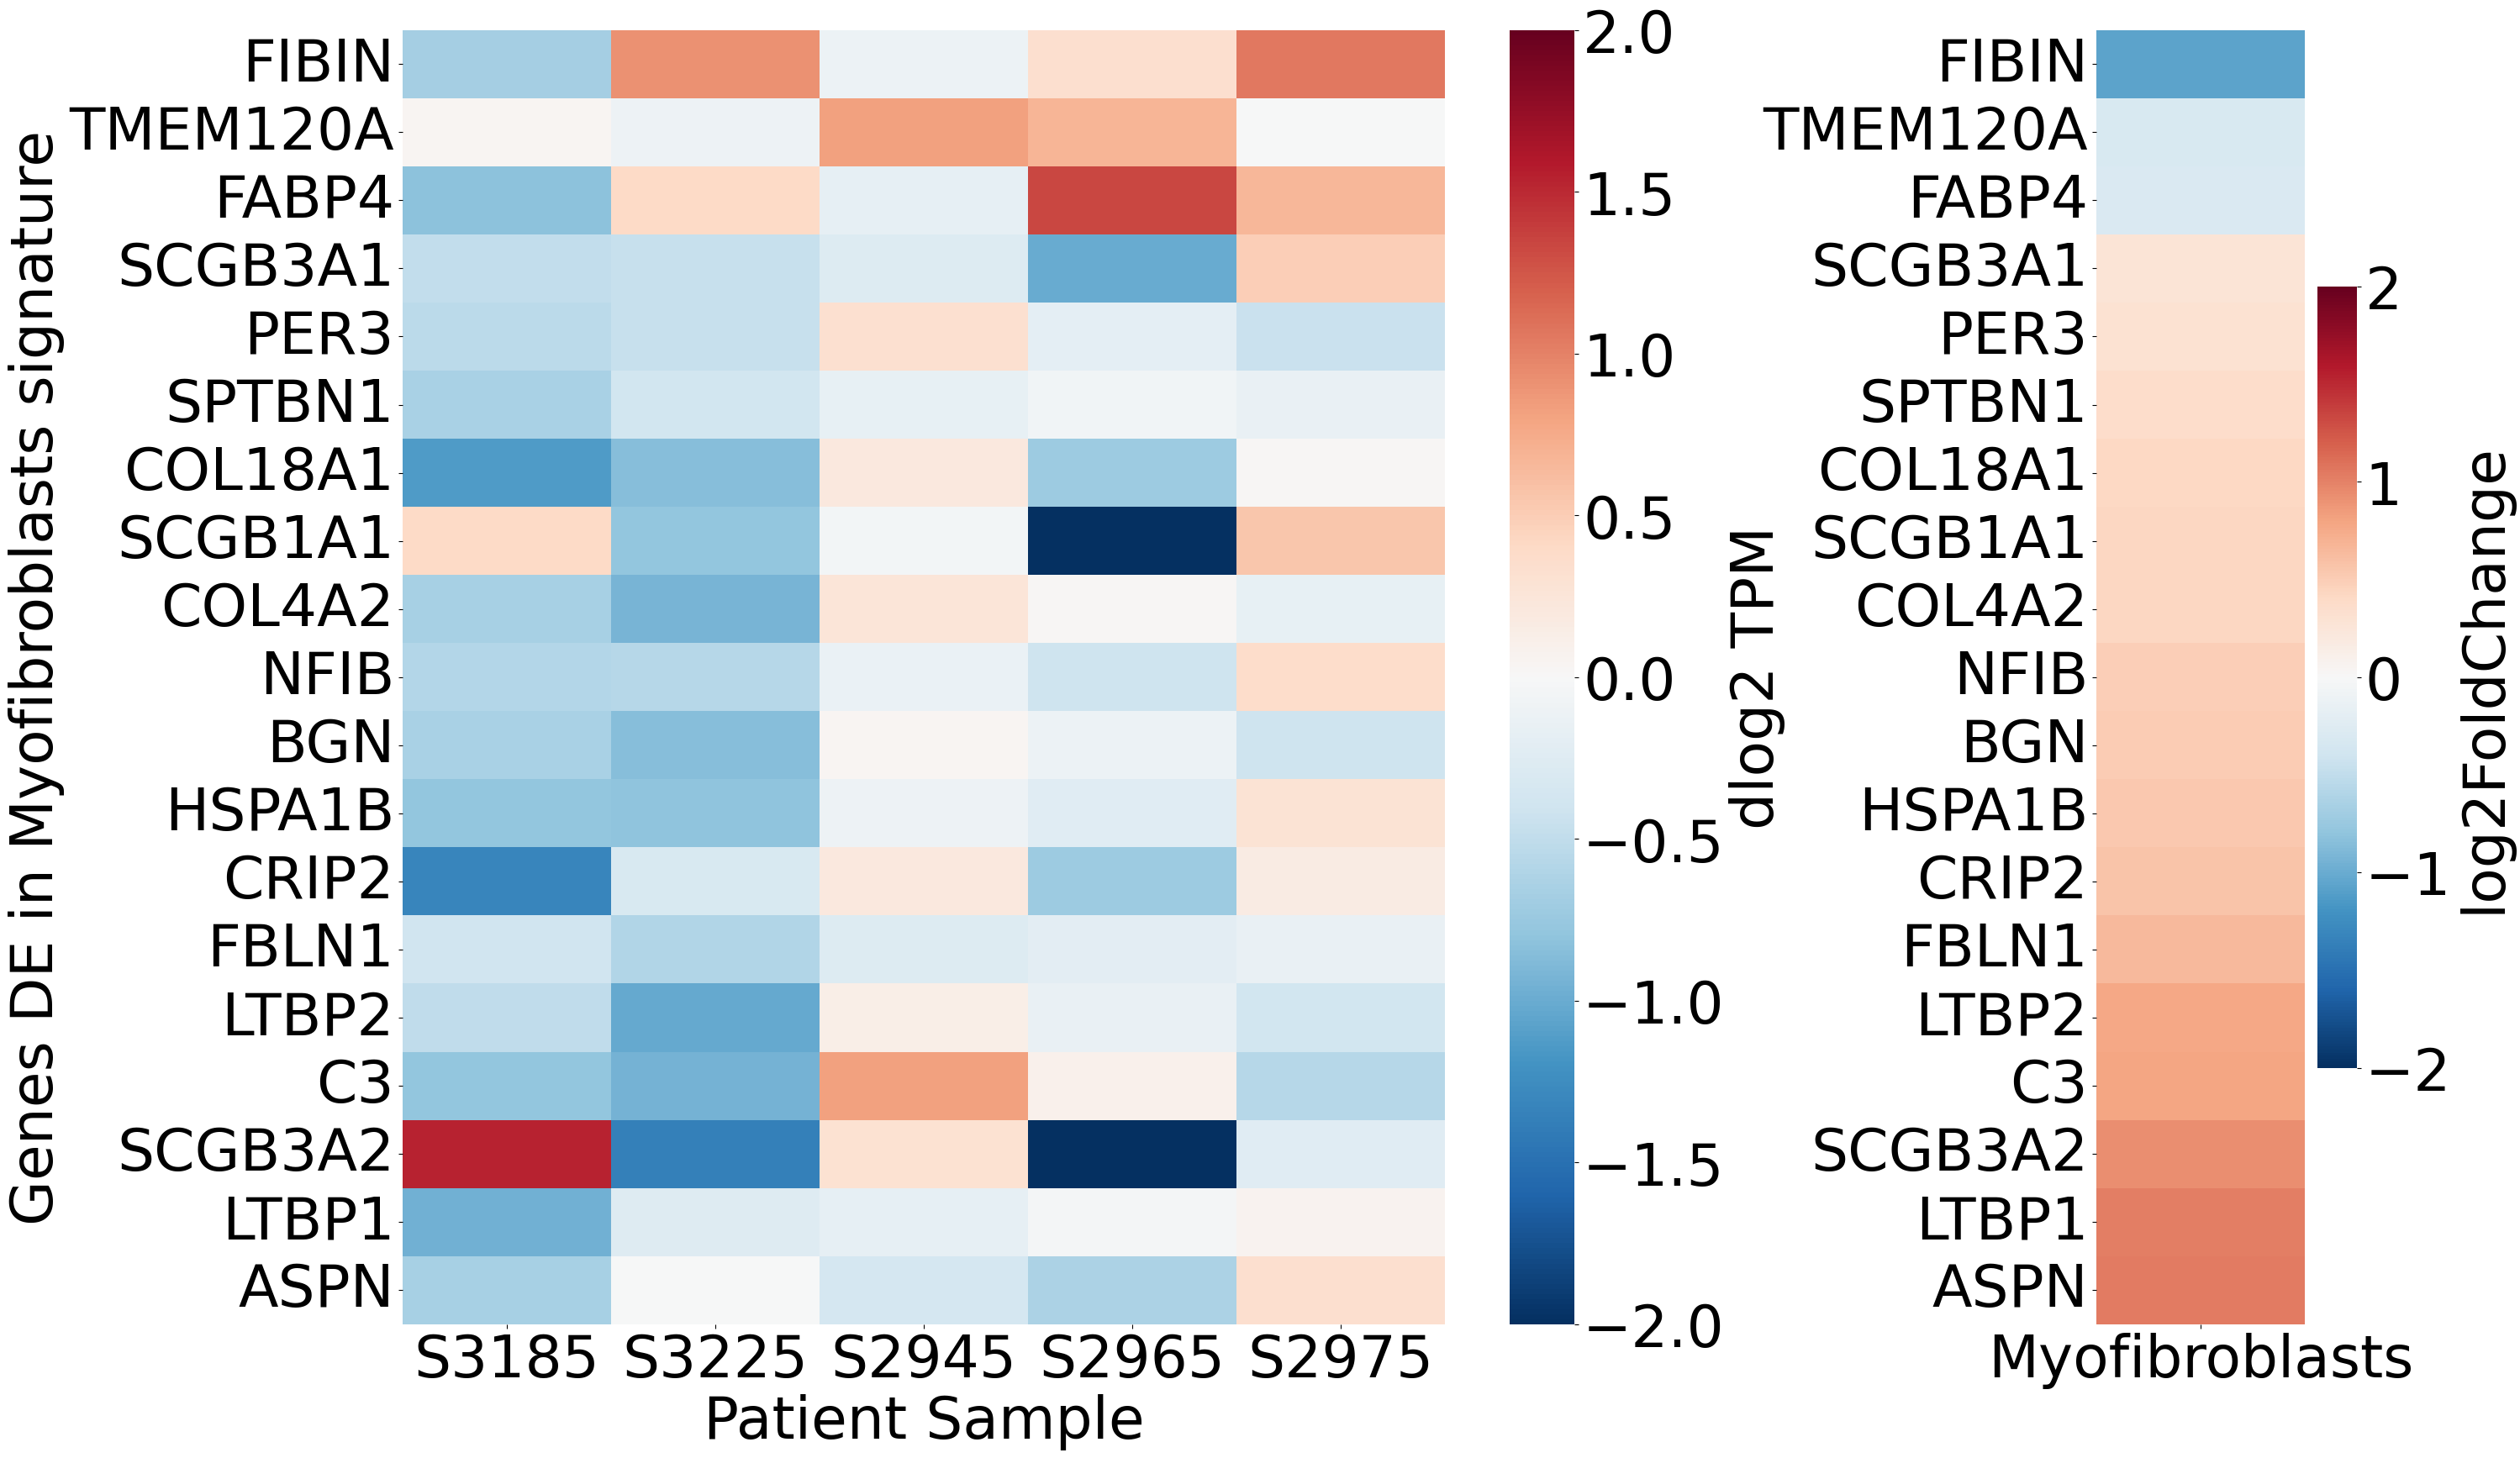

In [ ]:
tpm = pd.read_csv('./data_for_code/comb_tpm.csv', index_col=0)

dmso_df = tpm[tpm.columns[tpm.columns.str.contains('D')]]
dmso_df = dmso_df[dmso_df.columns[dmso_df.columns.str[-1] == '5']]
dmso_df = dmso_df[dmso_df.columns[~dmso_df.columns.str.contains('2952')]]

drug_df = tpm[tpm.columns[~tpm.columns.str.contains('D')]]
drug_df = drug_df[drug_df.columns[drug_df.columns.str[-1] == '5']]
drug_df = drug_df[drug_df.columns[~drug_df.columns.str.contains('2952')]]

diff_df = DataFrame(np.array(drug_df) - np.array(dmso_df), index=drug_df.index, columns=drug_df.columns)

mean_diff = diff_df.mean(axis=1)
pos_df = DataFrame(mean_diff[mean_diff > 0.25], columns=['d_mean'])
pos_df['direct'] = 1
neg_df = DataFrame(mean_diff[mean_diff < -0.25], columns=['d_mean'])
neg_df['direct'] = -1
genes_up_down = pd.concat([pos_df, neg_df])

nom = 'Myofibroblasts'
sign_df = pd.read_csv(f'./data_for_code/res_{nom}.csv', index_col=0)
sig_df = sign_df[sign_df['p_val_adj'] < 0.05]
pos_sig = sig_df[sig_df['avg_log2FC'] > 0.25]
pos_sig['direct_sig'] = 1
neg_sig = sig_df[sig_df['avg_log2FC'] < -0.25]
neg_sig['direct_sig'] = -1
sig_df = pd.concat([pos_sig, neg_sig])
ind_com = list(set(sig_df.index) & set(genes_up_down.index))
sig_df = pd.concat([sig_df.loc[ind_com], genes_up_down.loc[ind_com]], axis=1)
fin_df = sig_df.query('direct_sig != direct')

sig_plot = sign_df[['log2FoldChange']].loc[fin_df.index].rename(columns={'log2FoldChange':nom}).sort_values(nom)
fig, (ax,ax2) = plt.subplots(1,2, figsize=(30,20), gridspec_kw={'width_ratios': [5, 1], 'height_ratios':[5]})
sns.heatmap(diff_df.loc[sig_plot.index], ax=ax, cbar_kws={'label': 'dlog2 TPM'}, cmap="RdBu_r", center=0, vmin=-2, vmax=2)
sns.heatmap(sig_plot, cbar_kws={'label': 'log2FoldChange'}, cmap="RdBu_r", ax=ax2, center=0, vmin=-2, vmax=2)
# fig.suptitle(f'Reversal of {nom} signature in Pyrithyldione treatment RNAseq', fontsize=30, verticalalignment='top', y=0.91)
ax.set_ylabel(f'Genes DE in {nom} signature', fontsize = 50)
ax.set_xlabel('Patient Sample', fontsize = 50)
plt.rcParams.update({'font.size': 50})
fig.subplots_adjust(wspace=0.5)

plt.savefig('./data_for_code/myo_cmap.svg') 
plt.show()

# sig_plot.to_csv('./data_for_code/genes_enrichr_Myofibroblasts.csv')
diff_df.loc[sig_plot.index].to_csv('./data_for_code/genes_supp_Myofibroblasts.csv')